# Evaluación de modelos candidatos

[Carga y preparación datos train y test](#Carga-y-preparación-datos-train-y-test)

[Recuperación de modelos de mlflow](#Recuperación-de-modelos-de-mlflow)

**Análisis**
* [Análisis balanced_accuracy](#Análisis-balanced_accuracy)
* [Análisis especificidad y sensibilidad](#Análisis-especificidad-y-sensibilidad)
* [Análisis por segmentos (géneros literarios)](#Análisis-por-segmentos-(géneros-literarios))
* [Análisis de las variables de cada modelo](#Análisis-de-las-variables-de-cada-modelo)

## Carga y preparación datos train y test

**Carga datos**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/maria/Dropbox/UCM/PD1/pruebas-proyecto/datosEntrenamientoModelosFinal.csv')

In [3]:
data.head()

,Bestseller,NumPages,SagaNumber,RedPerc,BluePerc,BelongsSaga,Price,WordsTitle,PriceFormat,BookInterest1M,...,World History,World War I,World War II,Writing,Young Adult,Young Adult Contemporary,Young Adult Fantasy,Young Adult Romance,Young Adult Science Fiction,Zombies
0,0.0,329.0,1.0,0.51,0.40,0,19.99,1.0,paperback,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,269.0,2.0,0.61,0.54,1,3.99,2.0,ebook,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2335.0,1.0,0.72,0.57,1,20.99,7.0,ebook,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,40.0,1.0,0.83,0.35,0,25.00,1.0,hardcover,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,189.0,1.0,0.59,0.26,0,15.00,4.0,paperback,0.0,...,0,0,0,0,0,0,0,0,0,0


**Separación train y test**

In [4]:
# Semilla
SEED = 22

# Proporción del conjunto de test
TEST_SIZE = 0.3

Separamos el conjunto de datos sin escalar en train y test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = data.drop('Bestseller', axis=1)
y = data['Bestseller']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=SEED)

In [7]:
X_test.head()

,NumPages,SagaNumber,RedPerc,BluePerc,BelongsSaga,Price,WordsTitle,PriceFormat,BookInterest1M,Rating20Days,...,World History,World War I,World War II,Writing,Young Adult,Young Adult Contemporary,Young Adult Fantasy,Young Adult Romance,Young Adult Science Fiction,Zombies
2720,300.0,2.0,0.49,0.28,1,19.79,4.0,ebook,100.0,4.25,...,0,0,0,0,0,0,0,0,0,0
2496,304.0,1.0,0.72,0.15,0,17.99,2.0,hardcover,0.0,4.26,...,0,0,0,0,1,0,0,0,0,0
2519,128.0,1.0,0.98,0.54,0,16.00,1.0,paperback,793.0,3.82,...,0,0,0,0,0,0,0,0,0,0
3352,336.0,1.0,0.52,0.56,0,14.79,5.0,paperback,100.0,4.06,...,0,0,0,0,0,0,0,0,0,0
2182,336.0,1.0,0.38,0.30,0,24.70,3.0,hardcover,0.0,3.94,...,0,0,0,0,1,0,0,0,0,0


### Escalado de variables
Escalamos las variables y dividimos en train y test

In [8]:
from sklearn.preprocessing import RobustScaler

In [9]:
data_scaled = data.copy()
X_scaled = data_scaled.drop('Bestseller', axis=1)
y_scaled = data_scaled['Bestseller']

# Dividimos en train y test
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_scaled, test_size=TEST_SIZE, stratify=y, random_state=SEED)

# Inicializamos RobustScaler
scaler = RobustScaler()

# Solo lo aplicamos a las variables numéricas
# Incluimos 'Zombies' que no hay que escalar porque el RobustScaler ignora la primera columna de la lista 
# (hemos hecho pruebas)
variables_numericas = ['Zombies', 'SagaNumber', 'NumPages', 'RedPerc', 'BluePerc', 'Price', 'WordsTitle', 'BookInterest1M',
                     'Rating20Days', 'PrevBestSellAuthor']

# Aplicamos el RobustScaler a los datos de entrenamiento y test
X_scaled_train[variables_numericas] = scaler.fit_transform(X_scaled_train[variables_numericas])
X_scaled_test[variables_numericas] = scaler.transform(X_scaled_test[variables_numericas])

In [10]:
X_scaled_test.head()

,NumPages,SagaNumber,RedPerc,BluePerc,BelongsSaga,Price,WordsTitle,PriceFormat,BookInterest1M,Rating20Days,...,World History,World War I,World War II,Writing,Young Adult,Young Adult Contemporary,Young Adult Fantasy,Young Adult Romance,Young Adult Science Fiction,Zombies
2720,-0.531250,1.0,0.078947,-0.37500,1,0.391026,0.5,ebook,0.000000,0.20,...,0,0,0,0,0,0,0,0,0,0.0
2496,-0.489583,0.0,0.684211,-0.78125,0,0.102564,-0.5,hardcover,-0.555556,0.22,...,0,0,0,0,1,0,0,0,0,0.0
2519,-2.322917,0.0,1.368421,0.43750,0,-0.216346,-1.0,paperback,3.850000,-0.66,...,0,0,0,0,0,0,0,0,0,0.0
3352,-0.156250,0.0,0.157895,0.50000,0,-0.410256,1.0,paperback,0.000000,-0.18,...,0,0,0,0,0,0,0,0,0,0.0
2182,-0.156250,0.0,-0.210526,-0.31250,0,1.177885,0.0,hardcover,-0.555556,-0.42,...,0,0,0,0,1,0,0,0,0,0.0


### Transformación de los datos de train

Como nuestra variable respuesta está desbalanceada, tenemos que:
1. Aplicar SMOTENC a los datos de entrenamiento para conseguir una proporción 50/50 y  un buen rendimiento del modelo. 
2. Redondear las variables que deben ser enteras pero se han convertido en decimales tras esta transformación
3. Aplicar OHE a PriceFormat (se hace después para que una fila no tenga múltiples valores de PriceFormat por el SMOTENC)

In [31]:
from imblearn.over_sampling import SMOTENC
import numpy as np

In [26]:
# Columnas de los géneros
columnas_generos = X_scaled_train.columns[14:]

# Columnas categóricas
categoricalColumns = ["BelongsSaga", "PriceFormat", 'HasTwitter', 'HasWikipedia'] + list(columnas_generos)

# Definimos la transformación smote
smote = SMOTENC(categorical_features = categoricalColumns, random_state = SEED)

In [27]:
def redondearVariables(X):
    variablesRedondeo = ["NumPages", "SagaNumber", "WordsTitle"]
    # Itera sobre las columnas especificadas y redondea sus valores
    for v in variablesRedondeo:
        X[v] = np.round(X[v])
    return X

In [28]:
def codificarPriceFormat(df):
    return pd.get_dummies(df, columns=['PriceFormat'], dtype=int)

In [29]:
def transformarTrain(X, y):
    X_t, y_t = smote.fit_resample(X, y)
    X_t = redondearVariables(X_t)
    X_t = codificarPriceFormat(X_t)
    return X_t, y_t

Aplicamos las transformaciones a los datos de train

In [32]:
X_train, y_train = transformarTrain(X_train, y_train)
X_scaled_train, y_scaled_train = transformarTrain(X_scaled_train, y_scaled_train)

### Transformación de los datos de test

Aplicamos OHE a PriceFormat para transformar los datos de test.

In [34]:
X_test = codificarPriceFormat(X_test)
X_scaled_test = codificarPriceFormat(X_scaled_test)

### Selección de variables

Nos guardamos la lista de variables de los modelos para los que se ha aplicado selección de variables.

In [80]:
dataRL = pd.read_csv('/Users/maria/Dropbox/UCM/PD1/pruebas-proyecto/datosEntrenamientoRL.csv')

In [81]:
dataRL = codificarPriceFormat(dataRL)
varRL = list(dataRL.columns)
if 'Bestseller' in varRL:
    varRL.remove('Bestseller')

## Recuperación de modelos de mlflow

In [67]:
import mlflow.pyfunc
import sqlite3

* Cargamos los parámetros de cada modelo candidato con mlflow
* Creamos el modelo correspondiente con esos parametros
* Entrenamos el modelo con los datos correspondientes (tras aplicar las transformaciones necesarias a los datos en cada caso)

In [12]:
# Función para cargar los hiperparámetros de un modelo

def load_model_from_db(database_name, run_id):
    """Dada una base de datos de SQLite y un Run ID devuelve los parámetros del modelo"""

    # Configuramos la URI del seguimiento de MLflow para que apunte a la base de datos SQLite
    mlflow.set_tracking_uri(f"sqlite:///{database_name}")

    # Conectamos con la base de datos SQLite
    conn = sqlite3.connect(database_name)
    
    # Obtenemos los hiperparámetros del modelo
    query = f"SELECT * FROM params WHERE run_uuid = '{run_id}'"
    params = conn.execute(query).fetchall()
    model_params = {param[0]: param[1] for param in params}

    return model_params

In [109]:
def clean_params(params):
    cleaned_params = {}
    for key, value in params.items():
        # Remove the 'classifier__' prefix from the key
        cleaned_key = key.replace('classifier__', '')
        
        # Convert specific string values to appropriate types
        if value.lower() == 'true':
            cleaned_params[cleaned_key] = True
        elif value.lower() == 'false':
            cleaned_params[cleaned_key] = False
        else:
            # Check if the value is in the form of a tuple
            if value.startswith('(') and value.endswith(')'):
                try:
                    # Convert the string representation of tuple to a tuple
                    tuple_value = tuple(map(int, value.strip('()').split(',')))
                    cleaned_params[cleaned_key] = tuple_value
                except ValueError:
                    cleaned_params[cleaned_key] = value
            else:
                # Try converting the value to a float
                try:
                    float_value = float(value)
                    # Convert to int if the float value has no decimals
                    if float_value.is_integer():
                        cleaned_params[cleaned_key] = int(float_value)
                    else:
                        cleaned_params[cleaned_key] = float_value
                # If conversion fails, keep the original value
                except ValueError:
                    cleaned_params[cleaned_key] = value
    return cleaned_params

**Regresión logística**

In [87]:
from sklearn.linear_model import LogisticRegression

In [110]:
# Definimos la base de datos
rl_database_name = 'RL_runs.db'
rl_run_id = 'd98ac0232b4549faa74cb9352d1be3cf'

# Cargamos los parámetros
rl_params = load_model_from_db(rl_database_name, rl_run_id)

# Creamos el modelo
RL_model = LogisticRegression(**clean_params(rl_params), random_state = SEED)

# Entrenamos el modelo
RL_model.fit(X_scaled_train[varRL], y_scaled_train)
RL_model

LogisticRegression(C=0.01, fit_intercept=False, l1_ratio=0.3333333333333333,
                   max_iter=2000, penalty='elasticnet', random_state=22,
                   solver='saga')

**Random Forest**

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
# Definimos la base de datos
rf_database_name = 'RF_runs.db'
rf_run_id = 'ea88379951384079b166f5f414b2f65b'

# Cargamos los parámetros
rf_params = load_model_from_db(rf_database_name, rf_run_id)

# Creamos el modelo
RF_model = RandomForestClassifier(**clean_params(rf_params), random_state = SEED)

# Entrenamos el modelo
RF_model.fit(X_train, y_train)
RF_model

RandomForestClassifier(max_depth=10, random_state=22)

Los parámetros elegidos del modelo que no aparecen en la tarjeta es porque coinciden con los parámetros por defecto.

**Perceptrón multicapa (MLP)**

In [69]:
from sklearn.neural_network import MLPClassifier

In [112]:
# Definimos la base de datos
mlp_database_name = 'MLP_runs.db'
mlp_run_id = 'a6e5a4cdffc94b2097820ba4e545f13d'

# Cargamos los parámetros
mlp_params = load_model_from_db(mlp_database_name, mlp_run_id)

# Creamos el modelo
MLP_model = MLPClassifier(**clean_params(mlp_params), random_state = SEED)

# Entrenamos el modelo
MLP_model.fit(X_scaled_train, y_scaled_train)
MLP_model

MLPClassifier(activation='logistic', alpha=0.9517679547364497,
              early_stopping=True, hidden_layer_sizes=(200, 100),
              learning_rate='adaptive', learning_rate_init=0.03492366438019531,
              random_state=22)

# Análisis

Calculamos las predicciones de cada modelo con los datos de test correspondientes

In [119]:
RL_pred = RL_model.predict(X_scaled_test[varRL])
RF_pred = RF_model.predict(X_test)
MLP_pred = MLP_model.predict(X_scaled_test)

# Lista de modelos
models = ['RL', 'RF', 'MLP']

# Lista de predicciones de cada modelo
predictions = [RL_pred, RF_pred, MLP_pred]

## Análisis balanced_accuracy

In [114]:
from sklearn.metrics import balanced_accuracy_score

In [127]:
# Lista para almacenar los resultados
balanced_accuracy_results = []

# Calcular balanced accuracy para cada modelo
for model, prediction in zip(models, predictions):
    balanced_acc = balanced_accuracy_score(y_test, prediction)
    balanced_accuracy_results.append((model, balanced_acc))

# Crear un DataFrame con los resultados
df_bal_acc = pd.DataFrame(balanced_accuracy_results, columns=['Model', 'Balanced Accuracy'])
df_bal_acc

,Model,Balanced Accuracy
0,RL,0.770767
1,RF,0.754088
2,MLP,0.795033


## Análisis especificidad y sensibilidad

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
def plot_confusion_matrix(cm, model_name):
    """
    Plots the confusion matrix using seaborn's heatmap.
    
    Parameters:
        cm (array): Confusion matrix.
        model_name (str): Name of the model.
    """
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

Confusion Matrix for RL:


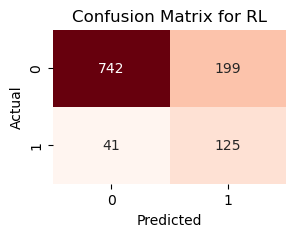


Confusion Matrix for RF:


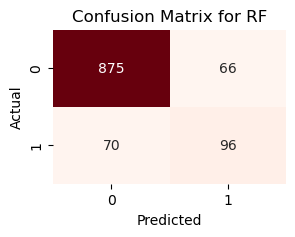


Confusion Matrix for MLP:


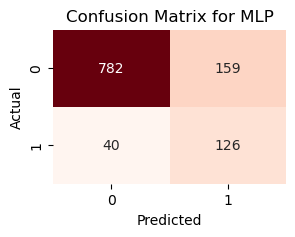

In [154]:
specificity_results = []
sensitivity_results = []

# Calcular especificidad y sensibilidad para cada modelo
for model, prediction in zip(models, predictions):
    # Calcular la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    
    # Print confusion matrix
    print(f"Confusion Matrix for {model}:")
    cm = confusion_matrix(y_test, prediction)
    plot_confusion_matrix(cm, model)
    print()
    
    # Calcular especificidad y sensibilidad
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    # Agregar los resultados a las listas
    specificity_results.append(specificity)
    sensitivity_results.append(sensitivity)

# Crear un DataFrame con los resultados de especificidad
df_specificity = pd.DataFrame({'Model': models, 'Specificity': specificity_results})

# Crear un DataFrame con los resultados de sensibilidad
df_sensitivity = pd.DataFrame({'Model': models, 'Sensitivity': sensitivity_results})

In [130]:
print("Especificidad:")
df_specificity

Especificidad:


,Model,Specificity
0,RL,0.788523
1,RF,0.929862
2,MLP,0.831031


In [131]:
print("Sensibilidad:")
df_sensitivity

Sensibilidad:


,Model,Sensitivity
0,RL,0.753012
1,RF,0.578313
2,MLP,0.759036


**Comparación métricas modelos**

In [134]:
df_results = pd.merge(df_bal_acc, df_specificity)
df_results = pd.merge(df_results, df_sensitivity)
df_results

,Model,Balanced Accuracy,Specificity,Sensitivity
0,RL,0.770767,0.788523,0.753012
1,RF,0.754088,0.929862,0.578313
2,MLP,0.795033,0.831031,0.759036


## Análisis por segmentos (géneros literarios)

## Análisis de las variables de cada modelo